<a href="https://colab.research.google.com/github/Rohithkr02/nlpproject/blob/main/naive_bayesmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/redditpreprocess.csv")
df

,post_id,text,label_adr
0,8zr5u3,Ive always chewed nail never knew anxiety alwa...,withdraw
1,8zr5u3_aug,Ive always chewed nail never knew anxiety alwa...,withdraw
2,8zr5u3_aug,Ive always chewed nail never knew anxiety alwa...,withdraw
3,8zr5u3_aug,Ive always chewed nail never knew anxiety anxi...,withdraw
4,8zgg5h,Ive Effexor XR 8 year started 75mg 4 year ago ...,withdraw
...,...,...,...
751,8zbap8_aug,taking Cipralex almost two year bumped 20mg fo...,withdraw
752,8y7dy7,Ive struggling anxiety depression basically lo...,withdraw
753,8y7dy7_aug,Ive struggling anxiety depression basically lo...,withdraw
754,8y7dy7_aug,Ive struggling anxiety depression basically lo...,withdraw


In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_adr'] = label_encoder.fit_transform(df['label_adr'])

In [36]:
df['label_adr'].value_counts()

label_adr
7    252
3    104
0     88
2     80
1     72
6     60
5     56
4     44
Name: count, dtype: int64

In [37]:
X=df.text
y=df['label_adr']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
model = Pipeline([
    ('cv', CountVectorizer()),
    ('mb', MultinomialNB())
])

model.fit(X_train,y_train)
y_pred=model.predict(X_test)

              precision    recall  f1-score   support

           0       0.74      0.64      0.68        22
           1       0.43      0.77      0.56        13
           2       0.63      1.00      0.77        17
           3       0.56      0.64      0.60        14
           4       0.86      0.55      0.67        11
           5       0.77      0.83      0.80        12
           6       0.78      1.00      0.88        14
           7       0.97      0.57      0.72        49

    accuracy                           0.71       152
   macro avg       0.72      0.75      0.71       152
weighted avg       0.77      0.71      0.71       152



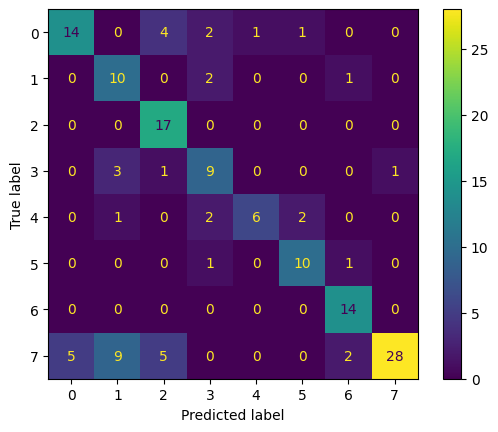

In [39]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [40]:
import joblib
joblib.dump(model,'model.pkl')

['model.pkl']